In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '1'
TR = '0'
AG = '0'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 113
INFO:root:Data length after removing invalid tweets: 33
INFO:root:Original data length: 9000
INFO:root:After applying filters: 1316
INFO:root:Data length after removing invalid tweets: 518
INFO:root:Explained variance of the SVD step: 38%


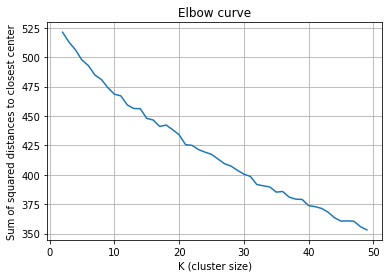

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

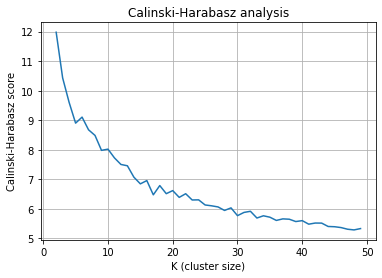

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

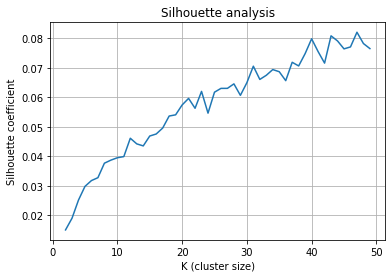

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

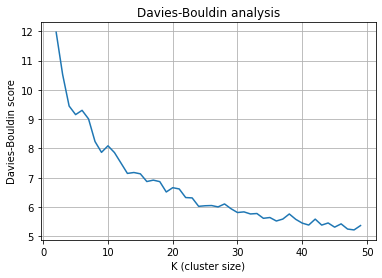

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [7]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 women like bitch dick hysterical men don want just hoe

Cluster 1:
 woman does difference bitch likes good didn trying suck like

Cluster 2:
 girls guys just hate reason don follow girl send hot

Cluster 3:
 bitch bitches girl hoes hoe cunt ass fuck shit whore

Cluster 4:
 illegal don refugees immigrants immigration people country just let like



In [8]:
NUM_SAMPLES=10
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [ 49  89  48 134 156 119  59 153  82  84]
['632', '#FamiliesBelongTogether#deport ALL #ILLEGALaliens #endDACA #RoundupDACA #defund #SanctuaryCities and #SanctuaryStates #BuildTheWall', '1', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['2217', 'Crimes committed by ILLEGAL immigrants should be public information everywhere like in Texas. More illegal aliens were arrested for homicide in the past 7 years in a single state than deaths by mass shooting in the other 49 states combined! #SendThemBack #BuildTheWall', '1', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['620', 'Anyone feeling so sad and angry may go to Assam and other NE states and may kindly take all the illegal immigrants to their state or home just like West Bengal CM stated! #NRCAssam #IndiaForIndians #MamtaBanerjee #sarbanandasonowal', '1', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

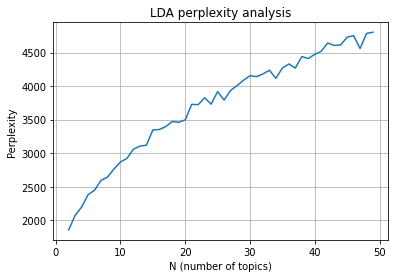

In [9]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
pred = lda.fit_lda(X=X, n_components=NUM_SAMPLES)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=50, X=X)

In [10]:
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()

Topic:  0
['women', 'bitch', 'day', 'like', 'fuck', 'just', 'illegal', 'know', 'girl', 'shit']
Topic:  1
['women', 'bitch', 'shit', 'man', 'stupid', 'hoes', 'just', 'woman', 'ass', 'lmao']
Topic:  2
['women', 'girls', 'bitch', 'just', 'don', 'bitches', 'ass', 'want', 'guys', 'wanna']
Topic:  3
['hoe', 'bitches', 'just', 'like', 'women', 'whore', 'bitch', 'stop', 'look', 'people']
Topic:  4
['women', 'like', 'bitch', 'cunt', 'men', 'whore', 'hoe', 'people', 'woman', 'girl']
Topic:  5
['women', 'like', 'bitch', 'fuck', 'bitches', 'dick', 'refugees', 'woman', 'just', 'don']
Topic:  6
['bitch', 'girl', 'like', 'women', 'just', 'border', 'daca', 'girls', 'dont', 'hate']
Topic:  7
['women', 'want', 'don', 'men', 'bitch', 'illegal', 'girl', 'yes', 'woman', 'rights']
Topic:  8
['immigrants', 'don', 'men', 'women', 'bitch', 'bitches', 'let', 'illegal', 'shit', 'like']
Topic:  9
['girls', 'bitch', 'women', 'people', 'immigration', 'just', 'good', 'cunt', 'woman', 've']
